In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df3= df

In [7]:
df3 = df.drop(['date'], axis=1)


In [8]:
print(df3)

               id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0      

In [9]:
X = df3.drop("price", axis=1)
y = df3["price"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,5467910190,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,9331800580,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,2407000405,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,5466700290,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,3026059361,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
21575,9578500790,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
5390,7202350480,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
860,1723049033,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

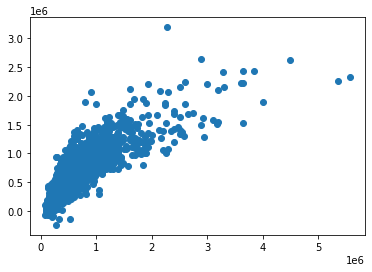

In [13]:
predictions= reg.predict(X_test)

plt.scatter(y_test, predictions)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)


LinearRegression()

In [17]:
y_pred = lin_reg.predict(X_test_poly)





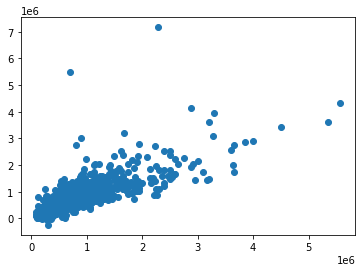

In [18]:
#plt.scatter(y_test, y_pred)

In [23]:
#comparing mean squared error of multi lin regression with poly regression and R squared 
from sklearn.metrics import mean_squared_error, r2_score
mse_lin = mean_squared_error(y_test, predictions)
mse_poly = mean_squared_error(y_test, y_pred)

r2_lin = r2_score(y_test, predictions)
r2_poly = r2_score(y_test, y_pred)

In [21]:
mse_lin

45164817780.90028

In [22]:
mse_poly

51553831714.252075

In [24]:
r2_lin

0.7012448735876524

In [25]:
r2_poly

0.6589829812765102